In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#Jupyter magic to notify when a cell finishes execution with %%notify command -- does not work with Jupyterlab
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

%pdb

<IPython.core.display.Javascript object>

Automatic pdb calling has been turned ON


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.nn.modules import Module
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import copy
import pickle
import model_archs

from utils_plot import show_sws_weights, show_weights, print_dims, prune_plot, draw_sws_graphs, joint_plot, plot_data
from utils_model import test_accuracy, train_epoch, retrain_sws_epoch, model_prune, get_weight_penalty, layer_accuracy
from utils_misc import trueAfterN, logsumexp, root_dir, model_load_dir, get_ab, get_sparsity
from utils_sws import GaussianMixturePrior, special_flatten, KL, compute_responsibilies, merger, sws_prune, sws_prune_l2, sws_prune_copy
from mnist_loader import search_train_data, search_retrain_data, search_validation_data, train_data, test_data, batch_size
from extract_targets import get_targets
from retrain_layer import init_retrain_layer
from retrain_model import retrain_model

test_data_full = Variable(test_data(fetch='data')).cuda()
test_labels_full = Variable(test_data(fetch='labels')).cuda()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
a = np.array([1,2,3])
np.append(a, 2)

array([1, 2, 3, 2])

In [3]:
model_kd_s, gmp_kd_s, res_kd_s = retrain_model(100, 10, 2500, 1250, 1e-6, int(0), 15, "LeNet_300_100", "full", 'CESNT', False, "./files")

0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 100.0 Variance: 10.0
Epoch: 10. Test Accuracy: 97.32
Epoch: 20. Test Accuracy: 97.72
Epoch: 30. Test Accuracy: 97.94
Epoch: 40. Test Accuracy: 98.09
Epoch: 50. Test Accuracy: 98.08
Retrain Test: 98.08, Prune Test: 97.69, Prune Sparsity: 96.57


96.54251528449795


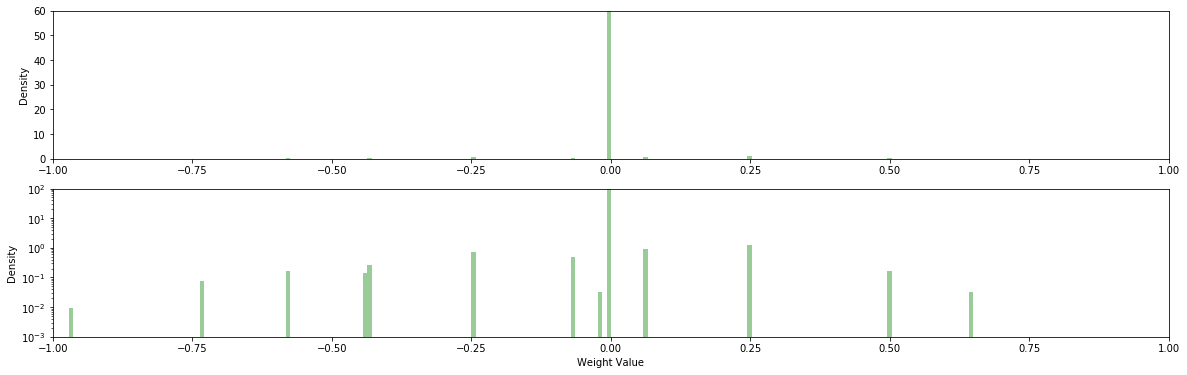

(97.68, 0.08251509070396423)

In [6]:
nm = sws_prune_copy(model_kd_s, gmp_kd_s)
print(get_sparsity(nm))
show_sws_weights(nm)
test_accuracy(test_data_full, test_labels_full, nm)

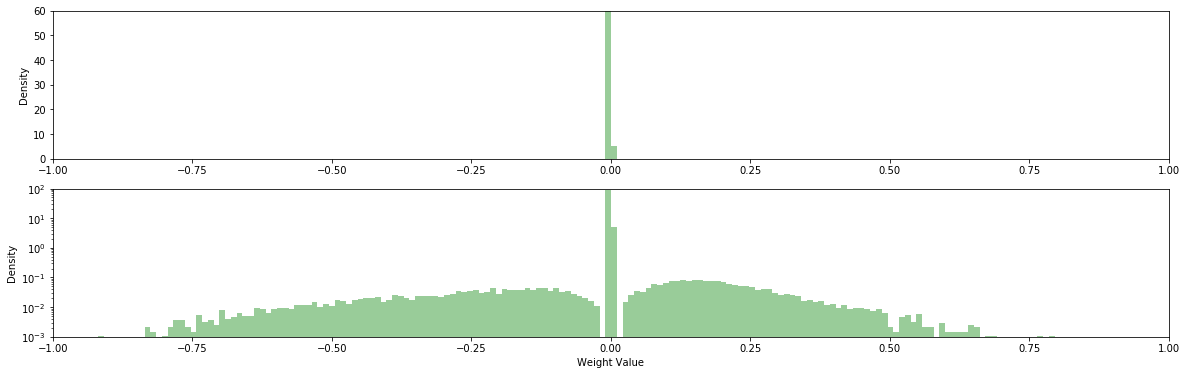

In [9]:
show_sws_weights(model_kd_s)

0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 100.0 Variance: 10.0
Epoch: 10. Test Accuracy: 97.74
Epoch: 20. Test Accuracy: 97.31
Epoch: 30. Test Accuracy: 96.32
Epoch: 40. Test Accuracy: 95.62
Epoch: 50. Test Accuracy: 95.63
Epoch: 60. Test Accuracy: 95.16
Epoch: 70. Test Accuracy: 94.91
Epoch: 80. Test Accuracy: 95.31
Epoch: 90. Test Accuracy: 95.30
Epoch: 100. Test Accuracy: 95.26
Retrain Test: 95.26, Retrain Validation: 95.48, Prune Test: 91.52, Prune Validation: 92.33, Prune Sparsity: 98.34


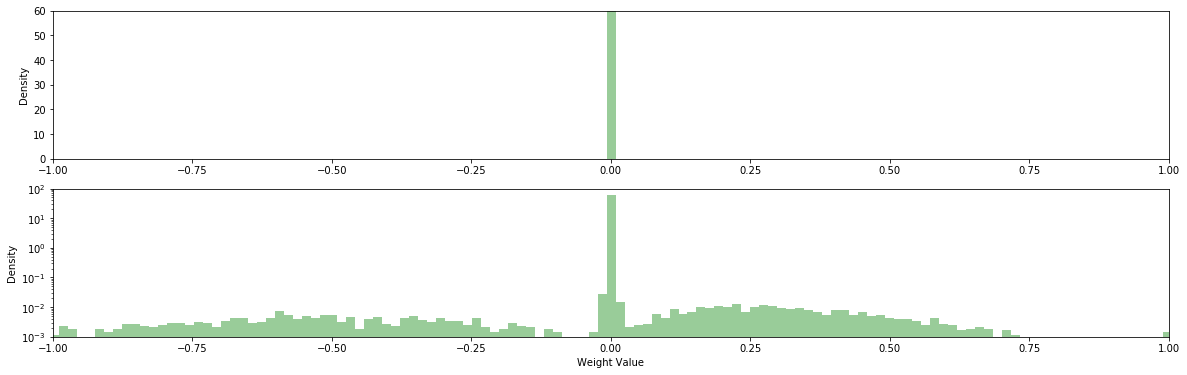

In [15]:
model, gmp, res = retrain_model(100, 10, 2500, 1250, 1e-6, int(0), 15, "LeNet_300_100", "search", 'CESNT', False, "")
show_sws_weights(model)

0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 100.0 Variance: 2.0
Epoch: 10. Test Accuracy: 97.26
Epoch: 20. Test Accuracy: 97.12
Epoch: 30. Test Accuracy: 95.80
Epoch: 40. Test Accuracy: 95.83
Epoch: 50. Test Accuracy: 95.81
Epoch: 60. Test Accuracy: 95.77
Epoch: 70. Test Accuracy: 95.61
Epoch: 80. Test Accuracy: 95.65
Epoch: 90. Test Accuracy: 95.53
Epoch: 100. Test Accuracy: 95.81
Retrain Test: 95.81, Retrain Validation: 95.88, Prune Test: 94.97, Prune Validation: 95.16, Prune Sparsity: 93.26


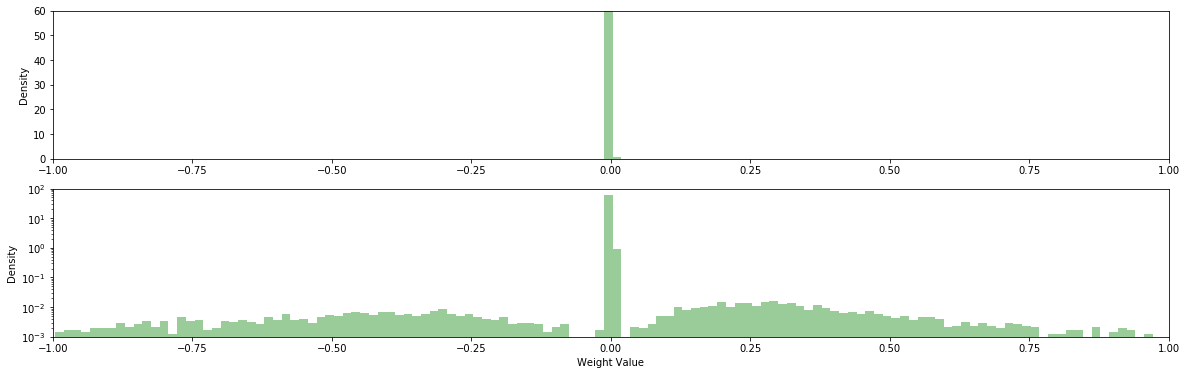

In [16]:
model_kd_s, gmp_kd_s, res_kd_s = retrain_model(100, 2, 2500, 1250, 1e-6, int(0), 15, "LeNet_300_100", "search", 'CESNT', True, "")
show_sws_weights(model_kd_s)

In [8]:
gmp_kd_s.scale.exp()

Variable containing:
 1.2399
 1.8814
[torch.cuda.FloatTensor of size 2 (GPU 0)]

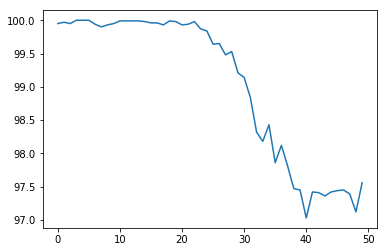

In [14]:
plt.plot(res_kd_s['train_acc'])

99.11931285398147


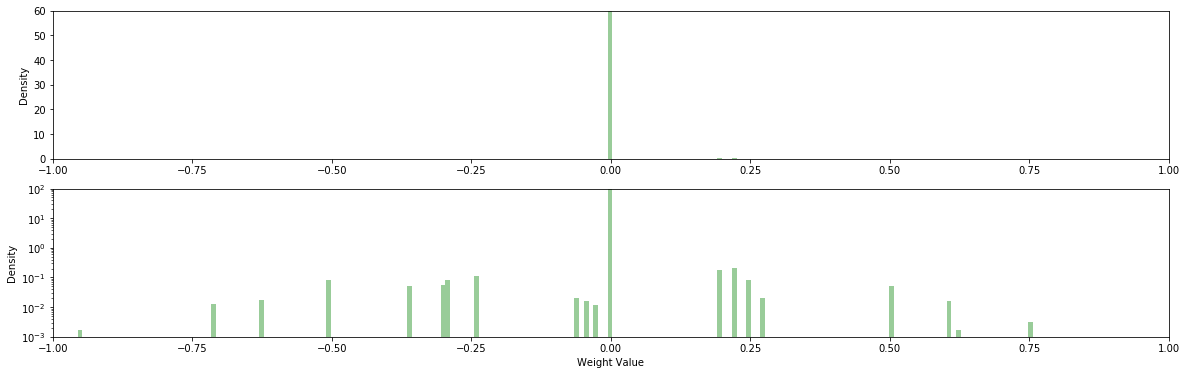

(82.31, 0.594719409942627)

In [9]:
nm = sws_prune_copy(model_kd_s, gmp_kd_s)
print(get_sparsity(nm))
show_sws_weights(nm)
test_accuracy(test_data_full, test_labels_full, nm)

In [3]:
#model_kd_s, gmp_kd_s, res_kd_s = retrain_model(5000, 2, 5000, 10, 1e-6, int(0), 15, "LeNet_300_100", "search", 'CESNT', False, "./files")

0-component Mean: 5000.0 Variance: 10.0
Non-zero component Mean: 5000.0 Variance: 2.0


KeyboardInterrupt: 

> /home/okz21/NNC/NN_compression/src/utils_model.py(21)test_accuracy()
     19         outputs = model(data)
     20         if loss_type == 'CE':
---> 21                 loss = nn.CrossEntropyLoss()(outputs, labels).data[0]
     22         else:
     23                 loss = nn.MSELoss(outputs, labels).data[0]

ipdb> exit


In [37]:
model_kd_s, gmp_kd_s, res_kd_s = retrain_model(100, 10, 2500, 1250, 1e-6, int(0), 15, "LeNet_300_100", "search", 'CESNT', False, "")

0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 100.0 Variance: 10.0
Epoch: 10. Test Accuracy: 97.85
Epoch: 20. Test Accuracy: 97.52
Epoch: 30. Test Accuracy: 96.51
Epoch: 40. Test Accuracy: 95.91
Epoch: 50. Test Accuracy: 95.58
Retrain Test: 95.58, Retrain Validation: 95.79, Prune Test: 93.82, Prune Validation: 93.50, Prune Sparsity: 98.66


In [12]:
gmp_kd_s.scale

Variable containing:
 0.3804
 0.5436
 1.0232
[torch.cuda.FloatTensor of size 3 (GPU 0)]

96.28446044784516


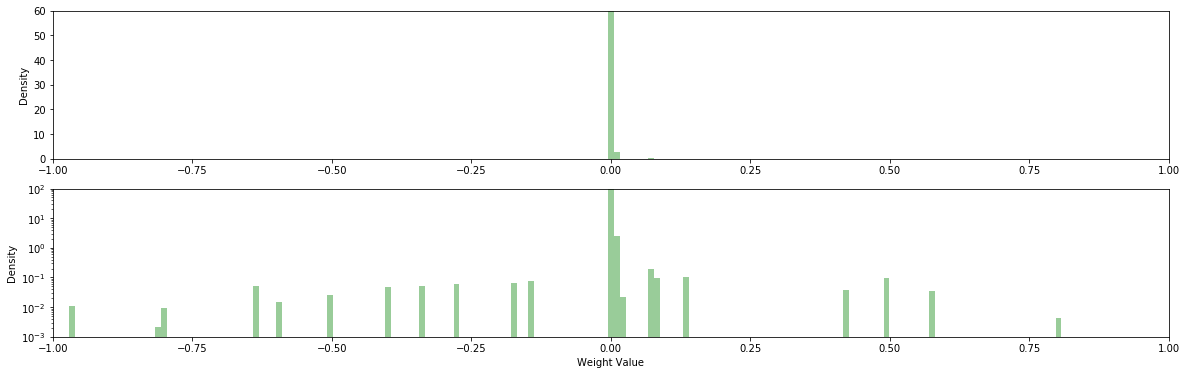

In [9]:
nm = sws_prune_copy(model_kd_s, gmp_kd_s)
print(get_sparsity(nm))
show_sws_weights(nm)